# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
query_url = "http://api.openweathermap.org/data/2.5/weather?appid=ff12f134f1a59b9bab3ac57c83d90f2b&units=imperial&q=portland"
weather_response = requests.get(query_url).json()
pprint(weather_response)

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 45.52, 'lon': -122.68},
 'dt': 1604364943,
 'id': 5746545,
 'main': {'feels_like': 58.15,
          'humidity': 65,
          'pressure': 1016,
          'temp': 59.34,
          'temp_max': 62.01,
          'temp_min': 55.99},
 'name': 'Portland',
 'sys': {'country': 'US',
         'id': 2008548,
         'sunrise': 1604328748,
         'sunset': 1604364960,
         'type': 3},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 236, 'speed': 1.14}}


In [11]:
#smallcities = ["portland","houston","seattle","new york","london","sydney","moose factory"]

updated_cities=[]
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q="

#for each city in cities, grab the city, lat, lng, max temp, humidity, cloudiness,
    #wind speed, country, date & add to DF
row=1

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])    
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        updated_cities.append(city)
        print(f"Now pulling data for #{row}, {city}")
    
    except KeyError:
        print(f"unable to process #{row}, {city}")
    row = row+1

print(f"--------------------")    
print(f"All finished. {len(lat)} cities had info pulled")



    
    



Now pulling data for #1, lompoc
Now pulling data for #2, hermanus
Now pulling data for #3, punta arenas
Now pulling data for #4, naryan-mar
Now pulling data for #5, puerto ayora
Now pulling data for #6, mar del plata
Now pulling data for #7, bredasdorp
Now pulling data for #8, bambous virieux
Now pulling data for #9, ribeira grande
Now pulling data for #10, los llanos de aridane
Now pulling data for #11, tasiilaq
Now pulling data for #12, mehamn
Now pulling data for #13, hambantota
Now pulling data for #14, dikson
Now pulling data for #15, busselton
Now pulling data for #16, mataura
Now pulling data for #17, kresttsy
Now pulling data for #18, arraial do cabo
Now pulling data for #19, albany
unable to process #20, mys shmidta
Now pulling data for #21, cidreira
Now pulling data for #22, naliya
Now pulling data for #23, ahipara
Now pulling data for #24, butaritari
Now pulling data for #25, tiksi
Now pulling data for #26, kapaa
Now pulling data for #27, marsh harbour
unable to process #28,

Now pulling data for #231, tautira
Now pulling data for #232, bulgan
Now pulling data for #233, forrest city
Now pulling data for #234, shache
Now pulling data for #235, soure
Now pulling data for #236, marovoay
Now pulling data for #237, ginir
Now pulling data for #238, hukeri
Now pulling data for #239, waingapu
Now pulling data for #240, berlevag
Now pulling data for #241, harer
Now pulling data for #242, axim
Now pulling data for #243, kerema
Now pulling data for #244, cangucu
unable to process #245, dalinghe
Now pulling data for #246, constitucion
Now pulling data for #247, kavaratti
Now pulling data for #248, salalah
Now pulling data for #249, pevek
Now pulling data for #250, cap malheureux
Now pulling data for #251, la orilla
Now pulling data for #252, grand gaube
Now pulling data for #253, tahoua
unable to process #254, paradwip
Now pulling data for #255, havre-saint-pierre
Now pulling data for #256, mandalgovi
Now pulling data for #257, hami
unable to process #258, rungata
Now 

Now pulling data for #461, saint anthony
Now pulling data for #462, lanzhou
Now pulling data for #463, north bend
Now pulling data for #464, powell river
Now pulling data for #465, lexington
Now pulling data for #466, honningsvag
Now pulling data for #467, sile
unable to process #468, kamenskoye
Now pulling data for #469, kysyl-syr
Now pulling data for #470, ust-koksa
Now pulling data for #471, anupshahr
Now pulling data for #472, saint-louis
Now pulling data for #473, krasnyy kut
Now pulling data for #474, opuwo
Now pulling data for #475, shizunai
Now pulling data for #476, coromandel
Now pulling data for #477, tessalit
Now pulling data for #478, lar
unable to process #479, umzimvubu
Now pulling data for #480, assiniboia
Now pulling data for #481, neyshabur
Now pulling data for #482, kelvington
Now pulling data for #483, otradnoye
Now pulling data for #484, haines junction
Now pulling data for #485, sovetskiy
Now pulling data for #486, sao jose da coroa grande
unable to process #487, 

In [12]:
len(lat)

584

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
city_dict = {"city":updated_cities,
                 "lat":lat,
                 "lng":lng,
                 "max temp(f)":maxtemp,
                 "humidity(%)":humidity,
                 "cloudiness(%)":cloudiness,
                 "wind speed(mph)":windspeed,
                 "country":country,
                 "date":date}

cities_df=pd.DataFrame(city_dict)
cities_df.to_csv('../Resources/Cities.csv')
cities_df.head()

,city,lat,lng,max temp(f),humidity(%),cloudiness(%),wind speed(mph),country,date
0,lompoc,34.64,-120.46,291.48,72,1,5.10,US,1604365505
1,hermanus,-34.42,19.23,290.93,85,11,3.13,ZA,1604365742
2,punta arenas,-53.15,-70.92,284.15,50,75,3.10,CL,1604365484
3,naryan-mar,67.67,53.09,271.72,92,67,5.72,RU,1604365742
4,puerto ayora,-0.74,-90.35,294.26,94,95,3.58,EC,1604365742


In [14]:
cities_df.describe()

,lat,lng,max temp(f),humidity(%),cloudiness(%),wind speed(mph),date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,19.005068,20.365171,287.815668,71.773973,52.208904,3.818459,1.604366e+09
std,33.613378,90.981434,11.987729,21.485572,42.443394,3.124630,9.130323e+01
min,-54.800000,-179.170000,247.850000,8.000000,0.000000,0.150000,1.604365e+09
25%,-8.907500,-64.530000,280.292500,60.000000,1.000000,1.500000,1.604366e+09
50%,22.180000,27.150000,290.260000,77.000000,69.000000,3.050000,1.604366e+09
75%,46.822500,102.262500,297.832500,88.000000,98.000000,5.100000,1.604366e+09
max,78.220000,179.320000,308.150000,100.000000,100.000000,20.100000,1.604366e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
for index, row in cities_df.iterrows():
    if row["humidity(%)"]>100:
        city=row["city"]
        print(f"{city} is too humid")
        
        
#my current data doesn't have any cities with humidity >100%
        
print(f"all done checking humidity for {len(cities_df)} cities")

all done checking humidity for 584 cities


In [16]:
#  Get the indices of cities that have humidity over 100%.
too_humid = []
for index, row in cities_df.iterrows():
    if row["humidity(%)"]>100:
        city=row["city"]
        print(f"{city} is too humid")
        too_humid.append(cities_df.loc[index])
        
print(f"all done checking humidity for {len(cities_df)} cities")
print(too_humid)

all done checking humidity for 584 cities
[]


In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#skipping since no cities have humidity greater than 100%. May come back later just to mess around with.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

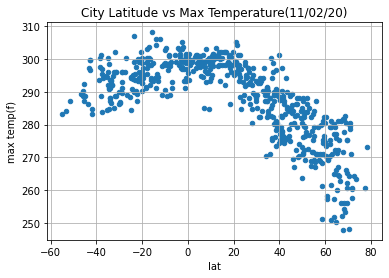

In [18]:
#Y is Max Temperature(F), X is Latitude
#Title: City Latitude vs Max Temperature(11/02/20)
cities_df.plot(kind="scatter",x="lat",y="max temp(f)", grid=True,
               title = "City Latitude vs Max Temperature(11/02/20)")

plt.savefig("Images/lat_vs_maxtemp.png")
plt.show()

## Latitude vs. Humidity Plot

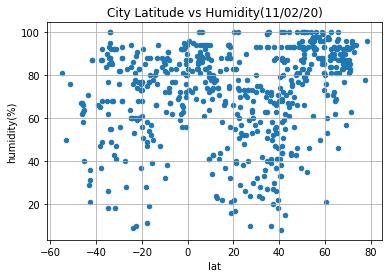

In [19]:
#Y is Humidity(%), X is Latitude
#Title: City Latitude vs Humidity(11/02/20)
cities_df.plot(kind="scatter",x="lat",y="humidity(%)", grid=True,
               title = "City Latitude vs Humidity(11/02/20)")

plt.savefig("Images/lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

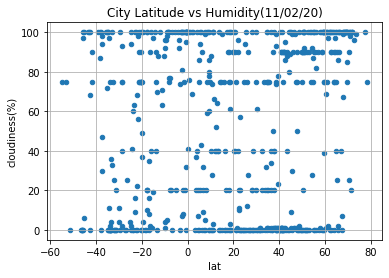

In [20]:
#Y is Cloudiness(%), X is Latitude
#Title: City Latitude vs Cloudiness(11/02/20)
cities_df.plot(kind="scatter",x="lat",y="cloudiness(%)", grid=True,
               title = "City Latitude vs Humidity(11/02/20)")

plt.savefig("Images/lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

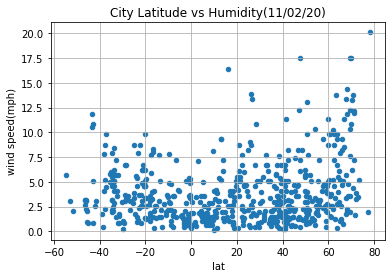

In [21]:
#Y is Wind Speed(mph), X is Latitude
#Title: City Latitude vs Wind Speed(11/02/20)
cities_df.plot(kind="scatter",x="lat",y="wind speed(mph)", grid=True,
               title = "City Latitude vs Humidity(11/02/20)")

plt.savefig("Images/lat_vs_windspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8429197261496258


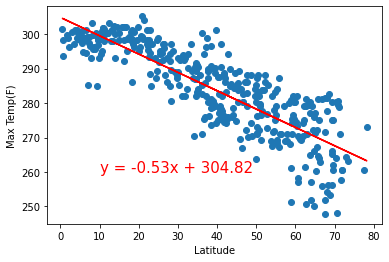

In [22]:
#Y is Max Temp, X is Latitude >=0
#The r-value is: rvalue
n_hem = cities_df.loc[cities_df["lat"]>=0,:]
x_values=n_hem["lat"]
y_values=n_hem["max temp(f)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NHlat_vs_tempLR.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5436225579137207


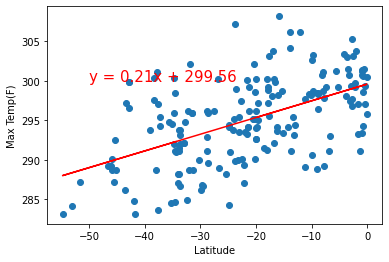

In [23]:
#Y is Max Temp, X is Latitude <=0
#The r-value is: rvalue
s_hem = cities_df.loc[cities_df["lat"]<=0,:]
x_values=s_hem["lat"]
y_values=s_hem["max temp(f)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SHlat_vs_tempLR.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2396794084485057


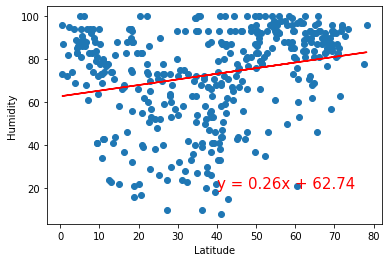

In [24]:
x_values=n_hem["lat"]
y_values=n_hem["humidity(%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NHlat_vs_humidityLR.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1996589741101076


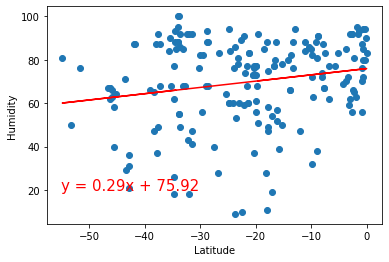

In [25]:
x_values=s_hem["lat"]
y_values=s_hem["humidity(%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SHlat_vs_humidityLR.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2313936920287877


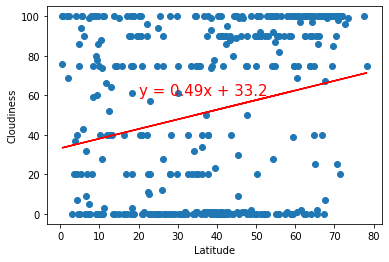

In [26]:
x_values=n_hem["lat"]
y_values=n_hem["cloudiness(%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NHlat_vs_cloudinessLR.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20775549571142798


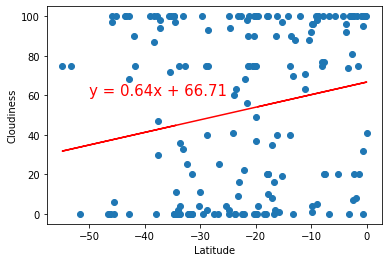

In [27]:
x_values=s_hem["lat"]
y_values=s_hem["cloudiness(%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SHlat_vs_cloudinessLR.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.32630813447186907


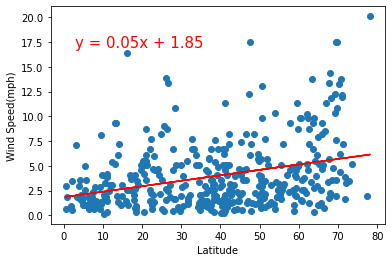

In [28]:
x_values=n_hem["lat"]
y_values=n_hem["wind speed(mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,17),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NHlat_vs_windspeedLR.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2706431060581658


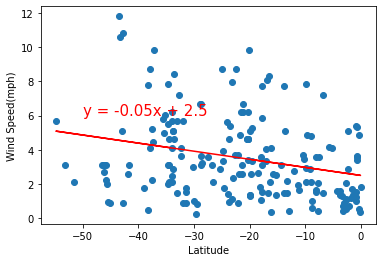

In [29]:
x_values=s_hem["lat"]
y_values=s_hem["wind speed(mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SHlat_vs_windspeedLR.png")
plt.show()